># <center> NEWS ARTICLES | TEXT CLASSIFICATION
_**Code by : KRISH GOYAL**_ <br>
_Email_id : goyal.krish0522@gmail.com_


Accuracy: 0.84
F1 Score: 0.83
Precision: 0.86
Recall: 0.84


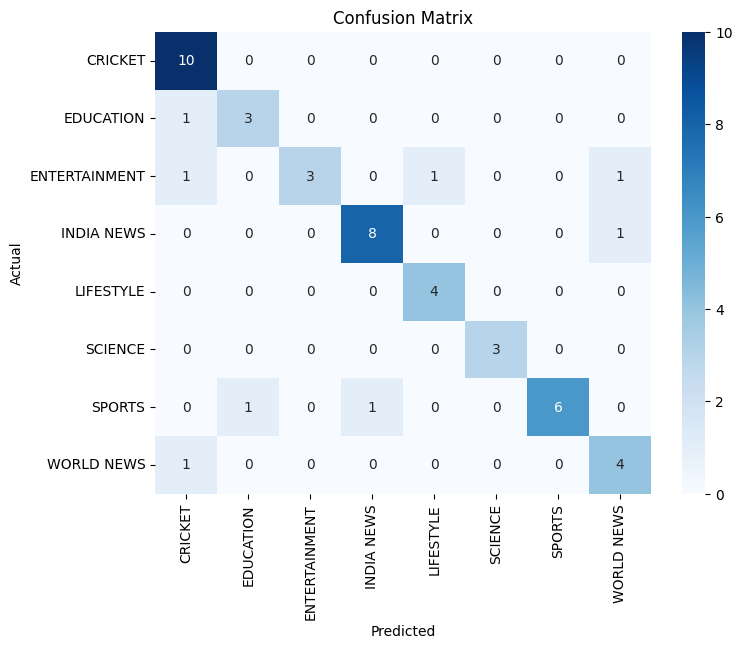

Confusion Matrix plot saved to 'confusion_matrix.png'.


<Figure size 640x480 with 0 Axes>

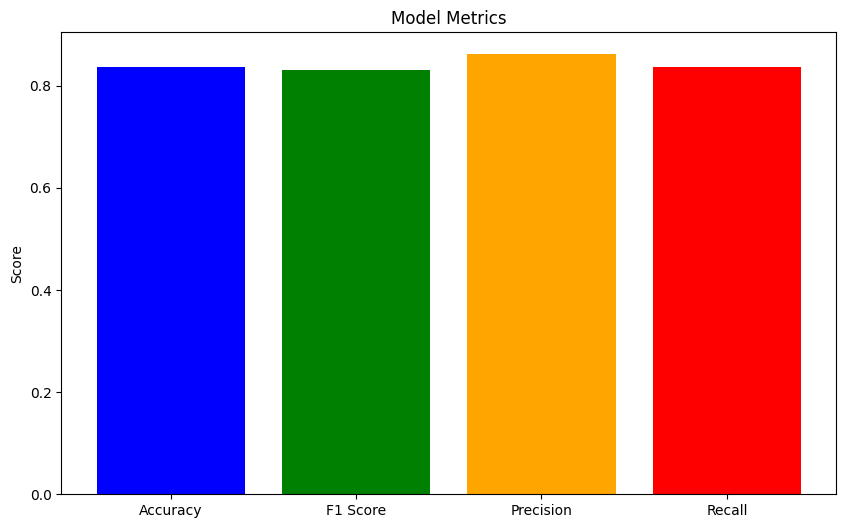

Metrics plot saved to 'model_metrics.png'.
Evaluation results saved to 'evaluation_results.csv'.


<Figure size 640x480 with 0 Axes>

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('classified_articles_data.csv')

def classify_articles(df):
    # Split the data into training and testing sets
    train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
    
    # Vectorize the text data
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(train_data['Article_Text'])
    X_test = vectorizer.transform(test_data['Article_Text'])
    
    # Train a RandomForest classifier
    classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Train the classifier using the target variable
    y_train = train_data['Category']
    classifier.fit(X_train, y_train)

    # Predict the categories for the test set
    y_pred = classifier.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(test_data['Category'], y_pred)
    f1 = f1_score(test_data['Category'], y_pred, average='weighted')
    precision = precision_score(test_data['Category'], y_pred, average='weighted')
    recall = recall_score(test_data['Category'], y_pred, average='weighted')
    conf_matrix = confusion_matrix(test_data['Category'], y_pred)
    
    # Save the evaluation results to a CSV file
    evaluation_results = pd.DataFrame({'Actual': test_data['Category'], 'Predicted': y_pred})
    evaluation_results.to_csv('evaluation_results.csv', index=False)
    
    # Print metrics
    print(f"\nAccuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Save the confusion matrix plot to a file
    plt.savefig('confusion_matrix.png')
    print("Confusion Matrix plot saved to 'confusion_matrix.png'.")
    
    # Plot other metrics
    metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
    values = [accuracy, f1, precision, recall]
    
    plt.figure(figsize=(10, 6))
    plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
    plt.title('Model Metrics')
    plt.ylabel('Score')
    plt.show()
    
    # Save the metrics plot to a file
    plt.savefig('model_metrics.png')
    print("Metrics plot saved to 'model_metrics.png'.")
    
    # Save the evaluation results to a CSV file
    evaluation_results.to_csv('evaluation_results.csv', index=False)
    print("Evaluation results saved to 'evaluation_results.csv'.")

classify_articles(df)